In [ ]:
# Install Cohere for embeddings, Umap to reduce embeddings to 2 dimensions,
# Altair for visualization, Annoy for approximate nearest neighbor search
!pip install cohere umap-learn altair annoy datasets tqdm
!pip install tiktoken
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 429.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a4d51fa1e31ab97092063e6840be980c9c144f5dd3372a6c85afa45164b3b679
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  C

In [ ]:
import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [ ]:
# Paste your API key here. Remember to not share publicly
api_key = 'l55gb5H7PTfK7sPBvzjsPm42yjthrDNsLlN34MZq'

# Create and retrieve a Cohere API key from os.cohere.ai
co = cohere.Client(api_key)

In [ ]:
# A function that classifies a list of inputs given the examples
def embed_text(texts):
  """
  Turns a piece of text into embeddings
  Arguments:
    text(str): the text to be turned into embeddings
  Returns:
    embedding(list): the embeddings
  """
  # Embed text by calling the Embed endpoint
  output = co.embed(
                model="embed-english-v3.0",
                input_type="search_document",
                texts=texts)
  embedding = output.embeddings

  return embedding

In [ ]:
import seaborn as sb

def plot_similarities(data, embedding):
  similarities = []

  for i in range(len(data)):
    similarities.append([])
    for j in range(len(data)):
      #print(qa_df['text'][i], ',', qa_df['text'][j], '->', cosine_similarity(np.array([qa[i]]), np.array([qa[j]])))
      similarities[-1].append(cosine_similarity(np.array([embedding[i]]), np.array([embedding[j]])))
    #print()

  similarities = np.array(similarities).squeeze()
  #print(similarities)
  sb.heatmap(similarities)

In [ ]:
qa_df_confusing = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'What color is the sky?',
   'Where does the bear live?',
   'What is an apple?',
   'The world cup is in Qatar',
   'The world cup is in the moon',
   'The previous world cup was in Russia',
   'The sky is green',
   'The sky is blue',
   'The bear lives in the the woods',
   'The bear lives in his apartment',
   'An apple is a fruit',
   'Apple is a company'
  ]})

qa_df_confusing
#print(len(qa_df_confusing))

,text
0,Where is the world cup?
1,What color is the sky?
2,Where does the bear live?
3,What is an apple?
4,The world cup is in Qatar
5,The world cup is in the moon
6,The previous world cup was in Russia
7,The sky is green
8,The sky is blue
9,The bear lives in the the woods


In [ ]:
qa_confusing = embed_text(texts=list(qa_df_confusing['text']))

In [ ]:
 # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(qa_confusing)
# Prepare the data to plot and interactive visualization
# using Altair
#df_explore = pd.DataFrame(data={'text': qa['text']})
#print(df_explore)

#df_explore = pd.DataFrame(data={'text': qa_df[0]})
df_explore = qa_df_confusing
df_explore['x'] = umap_embeds[:,0]
df_explore['y'] = umap_embeds[:,1]

# Plot
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=#'x',
    alt.X('x',
        scale=alt.Scale(zero=False)
    ),
    y=
    alt.Y('y',
        scale=alt.Scale(zero=False)
    ),
    tooltip=['text']
).properties(
    width=700,
    height=400
)
chart.interactive()

alt.Chart(...)

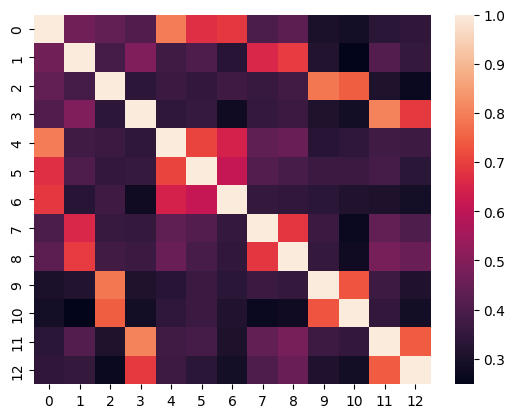

In [ ]:
plot_similarities(qa_df_confusing, qa_confusing)